In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

Hartree = 27.2114 # eV

In [2]:
kpts    = [ 0 ,     10      , 20]
klabels = ['L', r'$\Gamma$', 'X']

In [3]:
data0 = np.loadtxt('../Octopus-noSOC/static/bandstructure')
kpath0 = data0[:, 0]
bands0 = data0[:, 4:]

fermi0 = np.loadtxt('../Octopus-noSOC/static/total-dos-efermi.dat')
fermi0 = fermi0[0,0]

bands0 = (bands0 - fermi0) * Hartree

In [4]:
data = np.loadtxt('static/bandstructure')
kpath = data[:, 0]
bands = data[:, 4:]

fermi = np.loadtxt('static/total-dos-efermi.dat')
fermi = fermi[0,0]

bands = (bands - fermi) * Hartree

gap = bands[10, 8]-bands[10, 7]

In [16]:
kpts1    = [ 0 ,     20      , 40]
klabels1 = ['L', r'$\Gamma$', 'X']

data1 = np.loadtxt('../Octopus-MGGA-noSOC/static/bandstructure')
kpath1 = data1[:, 0]
bands1 = data1[:, 4:]

fermi1 = np.loadtxt('../Octopus-MGGA-noSOC/static/total-dos-efermi.dat')
fermi1 = fermi1[0,0]

bands1 = (bands1 - fermi1) * Hartree

gap1 = bands1[20, 4]-bands1[20, 3]

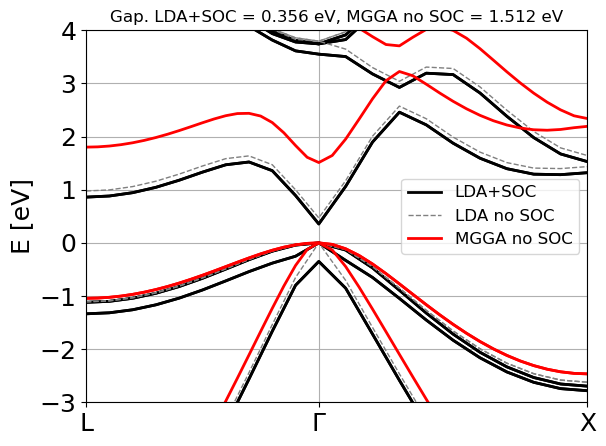

In [17]:
plt.title(f'Gap. LDA+SOC = {np.round(gap,3)} eV, MGGA no SOC = {np.round(gap1,3)} eV', fontsize=12)
line0 = plt.plot(kpath, bands, c='black', lw=2)
line1 = plt.plot(kpath0, bands0, c='gray', lw=1, ls='--')
line2 = plt.plot(kpath1, bands1, c='red', lw=2, ls='-')
plt.legend([line0[0], line1[0], line2[0]], ['LDA+SOC', 'LDA no SOC', 'MGGA no SOC'], fontsize=12)
plt.ylabel('E [eV]')
plt.xticks(kpath[kpts], klabels)
plt.ylim(-3, 4)
plt.xlim(kpath[0], kpath[-1])
plt.grid()
plt.tight_layout()
plt.savefig('Octopus.png')
plt.show()